## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [3]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')
file_path= "/content/drive/MyDrive/Copy of Global Terrorism Data.csv"
df= pd.read_csv(file_path,encoding='latin-1')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


**Year wise distribution of terror attacks**

In [8]:
df.iyear.value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Incidents')

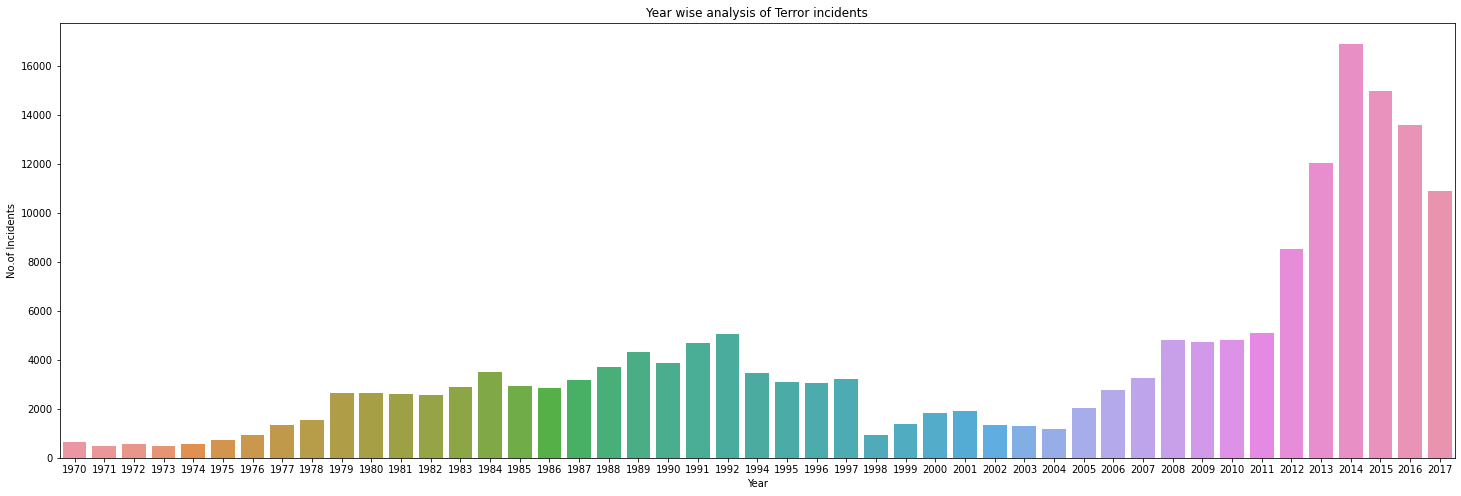

In [9]:
plt.figure(figsize=(25,8))

sns.countplot(x='iyear',data=df)
plt.title('Year wise analysis of Terror incidents')
plt.xlabel('Year',{'fontsize':10})
plt.ylabel('No.of Incidents',{'fontsize':10})

**Most Terror Affected Countries**

In [10]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
country_frequency= pd.DataFrame(df.country_txt.value_counts().head(30))
country_frequency

,country_txt
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


Text(0, 0.5, 'No.of Terrorist Attacks')

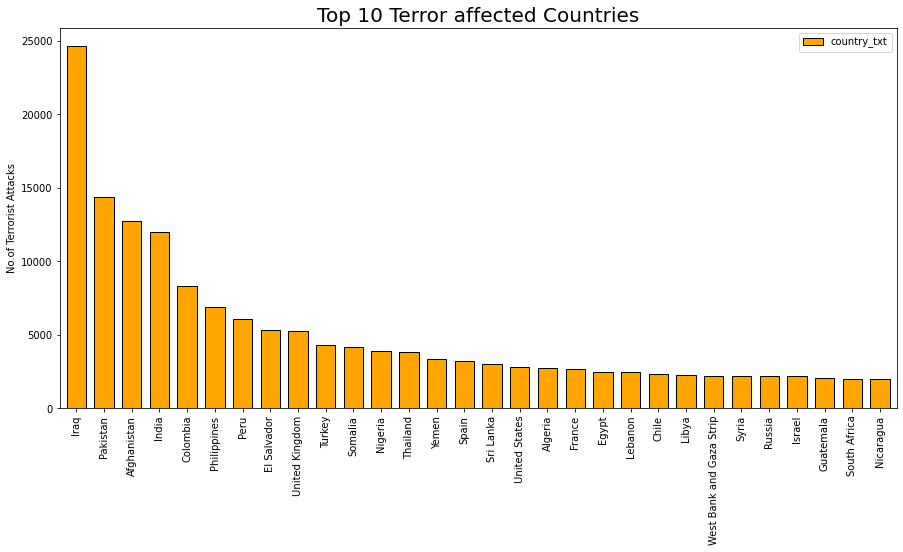

In [12]:
country_frequency.plot.bar(width=0.7,color='orange',edgecolor='black',figsize=(15,7))
plt.title('Top 10 Terror affected Countries',{'fontsize':20})
plt.ylabel('No.of Terrorist Attacks')


**Region Wise Distribution of Terrorism**

In [13]:
region_frequency=pd.DataFrame(df.region_txt.value_counts())
region_frequency

,region_txt
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456
East Asia,802


Text(0, 0.5, 'Region')

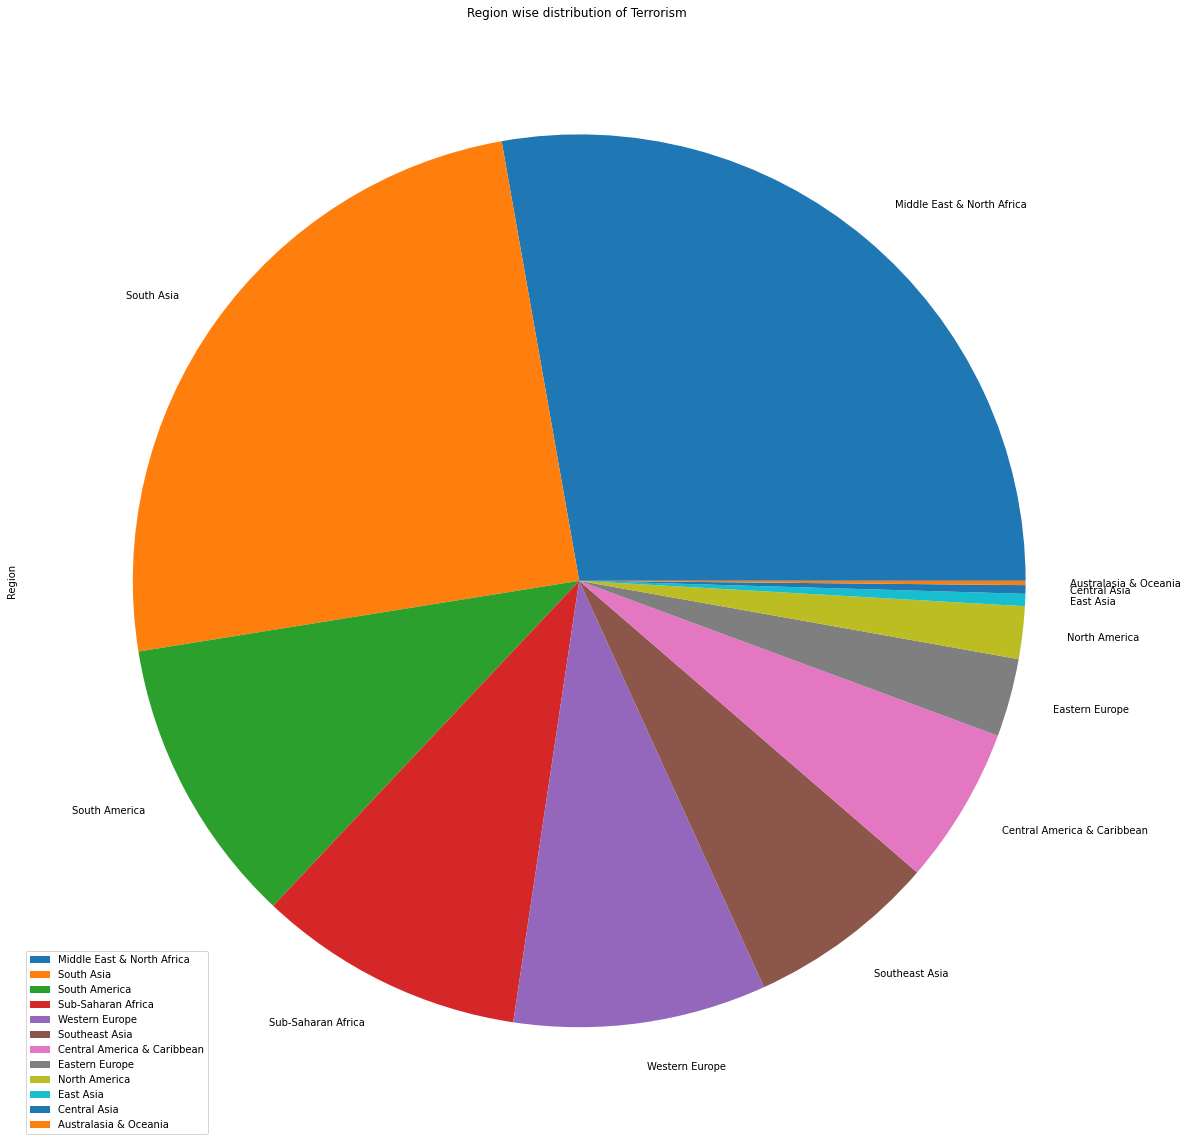

In [14]:
a=region_frequency.plot.pie(y='region_txt',figsize=(20,35))
plt.title('Region wise distribution of Terrorism ')
plt.ylabel('Region')

**Most affected Cities in each regions of the world**

In [15]:
df.groupby('region_txt')['city'].value_counts()


region_txt             city               
Australasia & Oceania  Sydney                 29
                       Noumea                 19
                       Melbourne              13
                       Bougainville Island    11
                       Panguna                11
                                              ..
Western Europe         madrid                  1
                       paris                   1
                       pasajes                 1
                       strasbourg              1
                       unknown                 1
Name: city, Length: 37298, dtype: int64

In [16]:
df[df.region_txt=='Middle East & North Africa'].city.value_counts().head(10).sort_index()


Baghdad      7589
Baqubah       745
Beirut        918
Benghazi      840
Fallujah      579
Istanbul     1048
Jerusalem     636
Kirkuk        925
Mosul        2265
Unknown      2665
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

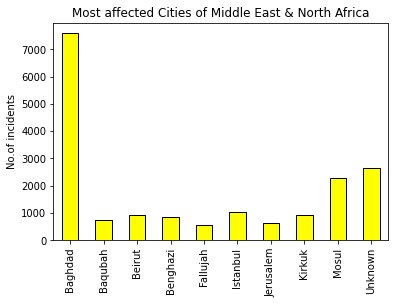

In [17]:
df[df.region_txt=='Middle East & North Africa'].city.value_counts().head(10).sort_index().plot.bar(color='yellow',edgecolor='black')
plt.title('Most affected Cities of Middle East & North Africa')
plt.ylabel('No.of incidents')

In [18]:
df[df.region_txt=='South Asia'].city.value_counts().head(10)

Karachi     2651
Unknown     2038
Peshawar     819
Quetta       803
Kabul        738
Srinagar     658
Dhaka        557
Imphal       426
Kandahar     363
Colombo      323
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

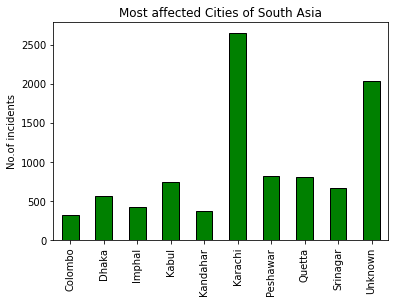

In [19]:
df[df.region_txt=='South Asia'].city.value_counts().head(10).sort_index().plot.bar(color='green',edgecolor='black')
plt.title('Most affected Cities of South Asia')
plt.ylabel('No.of incidents')

In [20]:
df[df.region_txt=='South America'].city.value_counts().head(10)

Lima            2359
Santiago        1615
Unknown         1234
Bogota           984
Medellin         848
Buenos Aires     462
Ayacucho         459
Cali             311
Huancayo         181
La Paz           175
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

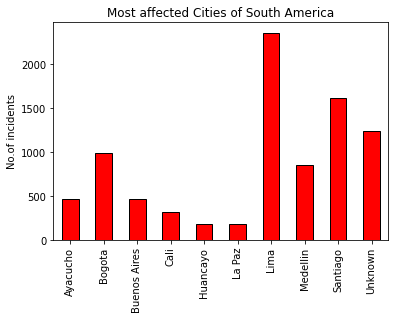

In [21]:
df[df.region_txt=='South America'].city.value_counts().head(10).sort_index().plot.bar(color='red',edgecolor='black')
plt.title('Most affected Cities of South America')
plt.ylabel('No.of incidents')

In [22]:
df[df.region_txt=='Sub-Saharan Africa'].city.value_counts().head(10)

Mogadishu       1581
Unknown          996
Maiduguri        442
Johannesburg     255
Bujumbura        242
Kismayo          204
Baidoa           152
Soweto           143
Durban           132
Kano             129
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

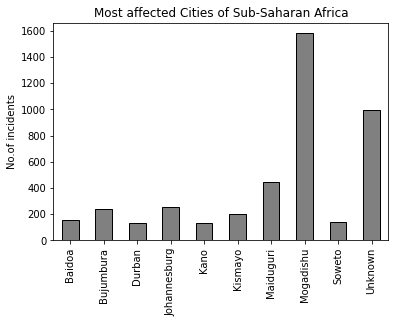

In [23]:
df[df.region_txt=='Sub-Saharan Africa'].city.value_counts().head(10).sort_index().plot.bar(color='grey',edgecolor='black')
plt.title('Most affected Cities of Sub-Saharan Africa')
plt.ylabel('No.of incidents')

In [24]:
df[df.region_txt=='Western Europe'].city.value_counts().head(10)

Belfast        2170
Athens         1018
Unknown         703
Paris           612
Rome            550
Madrid          414
London          399
Londonderry     366
Bilbao          334
Ajaccio         305
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

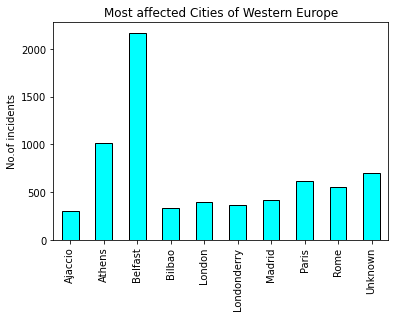

In [25]:
df[df.region_txt=='Western Europe'].city.value_counts().head(10).sort_index().plot.bar(color='cyan',edgecolor='black')
plt.title('Most affected Cities of Western Europe')
plt.ylabel('No.of incidents')

In [26]:
df[df.region_txt=='Southeast Asia'].city.value_counts().head(10)

Unknown           868
Manila            488
Bangkok           220
Zamboanga City    157
Cotabato City     152
Yala              136
Muang             115
Davao City        103
Jakarta            84
Marawi             78
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

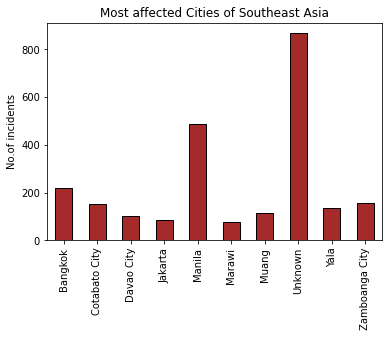

In [27]:
df[df.region_txt=='Southeast Asia'].city.value_counts().head(10).sort_index().plot.bar(color='brown',edgecolor='black')
plt.title('Most affected Cities of Southeast Asia')
plt.ylabel('No.of incidents')

In [28]:
df[df.region_txt=='Central America & Caribbean'].city.value_counts().head(10)

San Salvador      1558
Unknown            983
Guatemala City     755
Managua            197
Santa Ana          182
Tegucigalpa        164
San Miguel         148
Port-au-Prince     117
San Vicente         98
Panama City         86
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

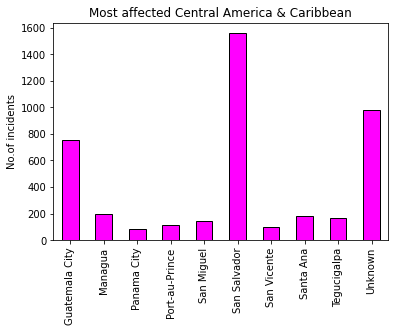

In [29]:
df[df.region_txt=='Central America & Caribbean'].city.value_counts().head(10).sort_index().plot.bar(color='magenta',edgecolor='black')
plt.title('Most affected Central America & Caribbean')
plt.ylabel('No.of incidents')

In [30]:
df[df.region_txt=='Eastern Europe'].city.value_counts().head(10)

Grozny         218
Donetsk        195
Makhachkala    194
Moscow         136
Nazran         131
Unknown        118
Khasavyurt      83
Nalchik         63
Kiev            60
Pristina        55
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

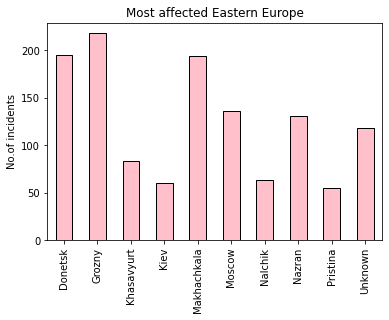

In [31]:
df[df.region_txt=='Eastern Europe'].city.value_counts().head(10).sort_index().plot.bar(color='pink',edgecolor='black')
plt.title('Most affected Eastern Europe')
plt.ylabel('No.of incidents')

In [32]:
df[df.region_txt=='North America'].city.value_counts().head(10)

New York City    460
San Juan         116
Mexico City      111
Los Angeles      109
San Francisco     98
Washington        85
Miami             85
Unknown           58
Chicago           57
Seattle           39
Name: city, dtype: int64

Text(0, 0.5, 'No.of incidents')

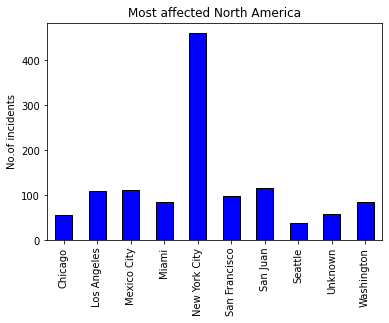

In [33]:
df[df.region_txt=='North America'].city.value_counts().head(10).sort_index().plot.bar(color='blue',edgecolor='black')
plt.title('Most affected North America')
plt.ylabel('No.of incidents')

**Most Terror affected States in Top 5 affected Countries**

In [34]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [35]:
df[df.country_txt=='Iraq'].provstate.value_counts().head(10)

Baghdad     7644
Saladin     3411
Al Anbar    3299
Nineveh     3241
Diyala      3041
Kirkuk      1669
Babil       1110
Basra        266
Unknown      148
Karbala      142
Name: provstate, dtype: int64

Text(0, 0.5, 'No.of incidents')

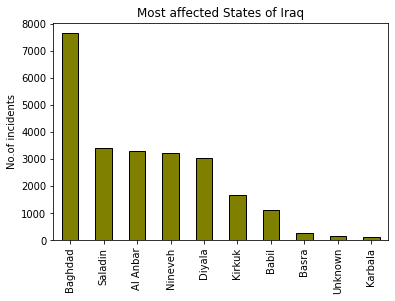

In [36]:
df[df.country_txt=='Iraq'].provstate.value_counts().head(10).plot.bar(color='olive',edgecolor='black')
plt.title('Most affected States of Iraq')
plt.ylabel('No.of incidents')

In [37]:
df[df.country_txt=='Pakistan'].provstate.value_counts().head(10)

Balochistan                            3710
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Federally Administered Tribal Areas    2392
North-West Frontier Province            866
Punjab                                  829
Islamabad Capital Territory             154
Unknown                                  49
Gilgit-Baltistan                         47
Azad Kashmir                             30
Name: provstate, dtype: int64

Text(0, 0.5, 'No.of incidents')

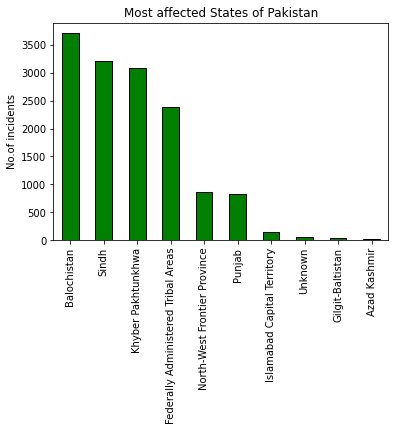

In [38]:
df[df.country_txt=='Pakistan'].provstate.value_counts().head(10).plot.bar(color='green',edgecolor='black')
plt.title('Most affected States of Pakistan')
plt.ylabel('No.of incidents')

In [39]:
df[df.country_txt=='Afghanistan'].provstate.value_counts().head(10)

Helmand      1234
Kandahar     1122
Nangarhar     972
Kabul         850
Ghazni        759
Herat         642
Faryab        515
Farah         513
Uruzgan       482
Kunduz        478
Name: provstate, dtype: int64

Text(0, 0.5, 'No.of incidents')

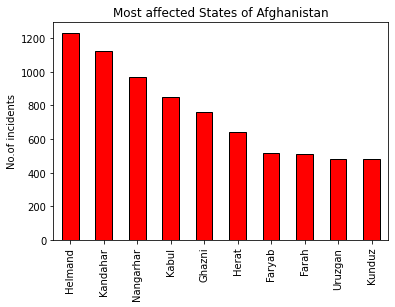

In [40]:
df[df.country_txt=='Afghanistan'].provstate.value_counts().head(10).plot.bar(color='red',edgecolor='black')
plt.title('Most affected States of Afghanistan')
plt.ylabel('No.of incidents')

In [41]:
df[df.country_txt=='India'].provstate.value_counts().head(10)

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Name: provstate, dtype: int64

Text(0, 0.5, 'No.of incidents')

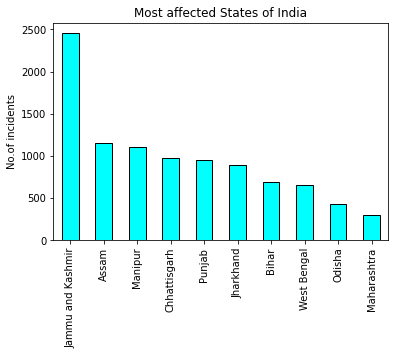

In [42]:
df[df.country_txt=='India'].provstate.value_counts().head(10).plot.bar(color='cyan',edgecolor='black')
plt.title('Most affected States of India')
plt.ylabel('No.of incidents')

In [43]:
df[df.country_txt=='Colombia'].provstate.value_counts().head(10)

Antioquia             1891
Bogota                1005
Valle del Cauca        578
Santander              471
Unknown                471
Norte de Santander     452
Cauca                  433
Arauca                 347
Cesar                  236
Huila                  230
Name: provstate, dtype: int64

Text(0, 0.5, 'No.of incidents')

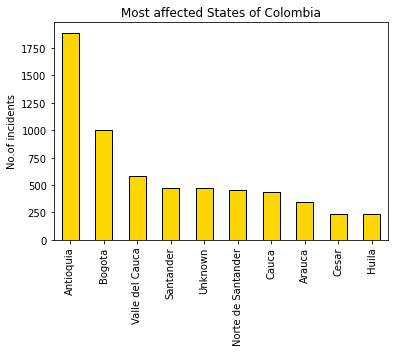

In [44]:
df[df.country_txt=='Colombia'].provstate.value_counts().head(10).plot.bar(color='gold',edgecolor='black')
plt.title('Most affected States of Colombia')
plt.ylabel('No.of incidents')

**Most common Types of Attacks**

In [45]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [46]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

Text(0, 0.5, 'Attack Types')

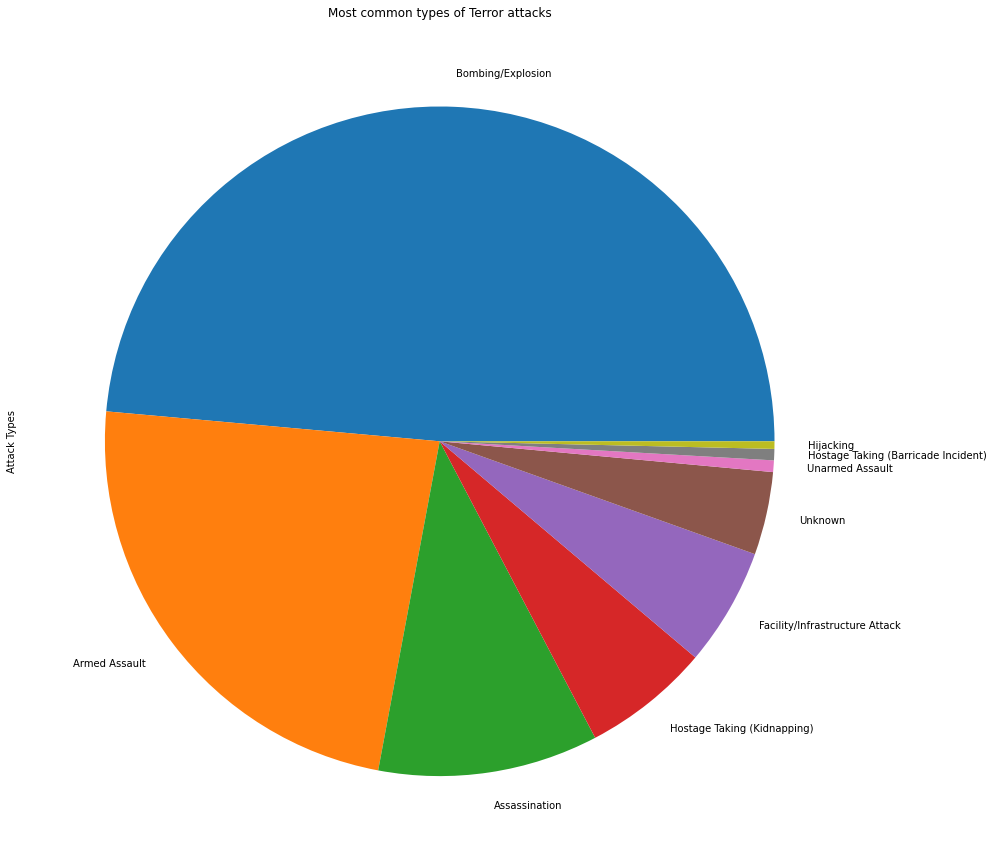

In [47]:
df.attacktype1_txt.value_counts().plot.pie(y='attacktype1_txt',figsize=(15,20))
plt.title('Most common types of Terror attacks')
plt.ylabel('Attack Types')

**Most Preferred Weapons of terror**

In [48]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [49]:
df.weaptype1_txt.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Text(0, 0.5, 'No.of incidents')

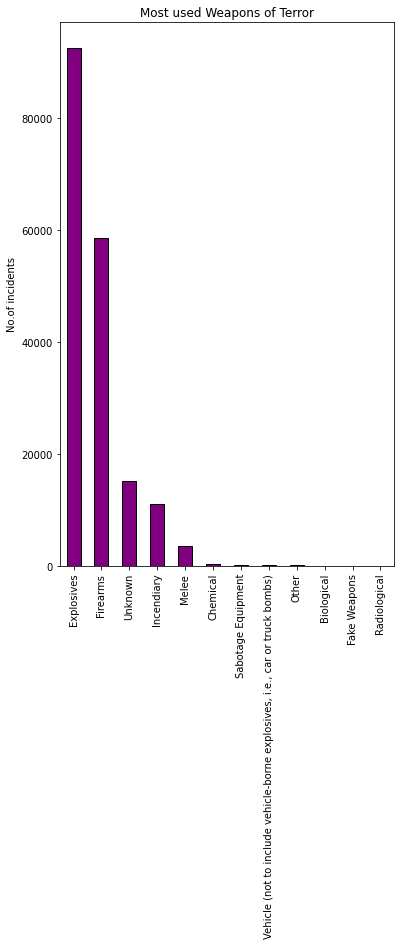

In [50]:
df.weaptype1_txt.value_counts().plot.bar(color='purple',edgecolor='black',figsize=(6,10))
plt.title('Most used Weapons of Terror')
plt.ylabel('No.of incidents')

In [51]:
df.groupby('weaptype1_txt')['weapsubtype1_txt'].value_counts()

weaptype1_txt  weapsubtype1_txt                         
Chemical       Poisoning                                       83
               Explosive                                       65
Explosives     Unknown Explosive Type                       44980
               Vehicle                                       9899
               Projectile (rockets, mortars, RPGs, etc.)     9848
               Other Explosive Type                          7304
               Grenade                                       5167
               Landmine                                      4251
               Suicide (carried bodily by human being)       3245
               Remote Trigger                                2719
               Sticky Bomb                                   1594
               Dynamite/TNT                                  1222
               Time Fuse                                      792
               Pipe Bomb                                      625
               Lett

Text(0, 0.5, 'No.of incidents')

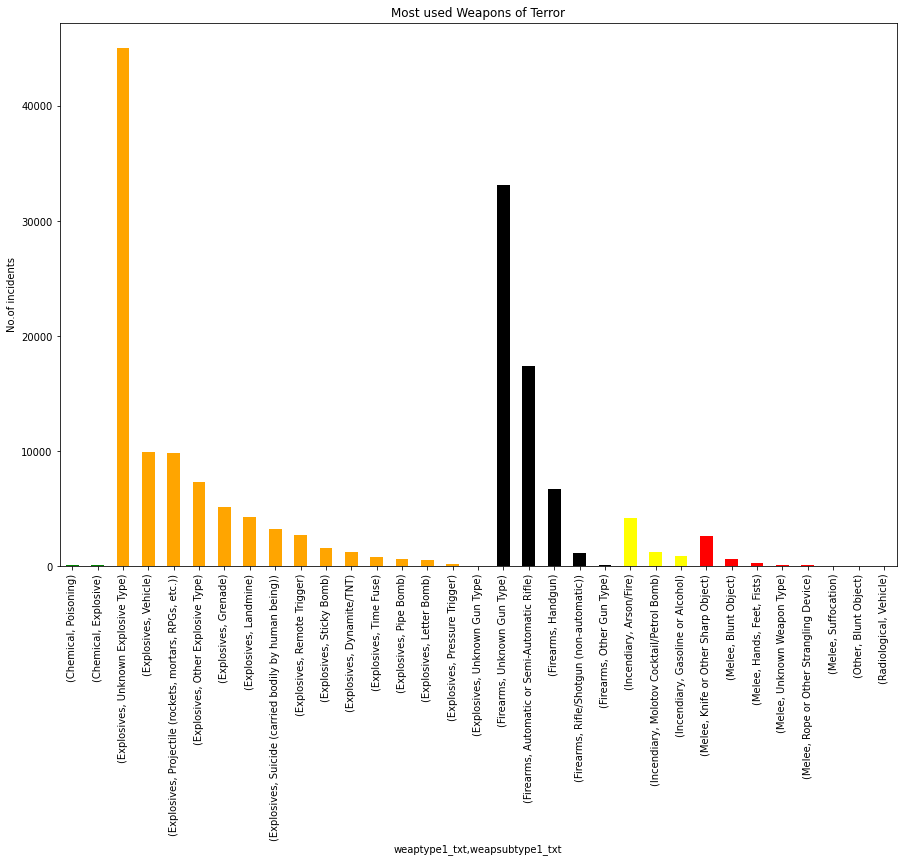

In [129]:
df.groupby('weaptype1_txt')['weapsubtype1_txt'].value_counts().plot.bar(color=('green','green','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','black','black','black','black','black','black','yellow','yellow','yellow','red','red','red','red','red','black','blue'),figsize=(15,10))
plt.title('Most used Weapons of Terror')
plt.ylabel('No.of incidents')

**Year on year analysis of Terror attack in most affected countries** 

In [56]:
df[df.country_txt=='Iraq'].iyear.value_counts().sort_index()

1975       1
1976       3
1979       2
1980       6
1981       3
1982       5
1983       3
1984       2
1987       3
1988       4
1989       4
1991       3
1992      35
1994      18
1995      17
1996      12
1997      21
1998       7
1999      12
2000      10
2001       3
2002       6
2003     102
2004     323
2005     617
2006     838
2007    1047
2008    1106
2009    1137
2010    1179
2011    1308
2012    1437
2013    2852
2014    3933
2015    2751
2016    3360
2017    2466
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

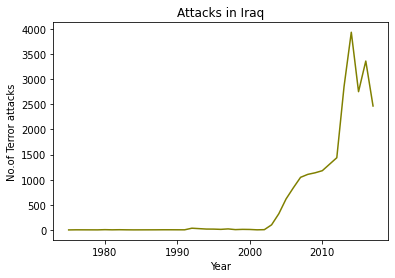

In [57]:
df[df.country_txt=='Iraq'].iyear.value_counts().sort_index().plot.line(color='olive')
plt.title('Attacks in Iraq')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [58]:
df[df.country_txt=='Pakistan'].iyear.value_counts().sort_index()

1970       1
1974       2
1975       2
1976       3
1978       2
1979       7
1980       1
1981       4
1982       4
1983       9
1984       3
1985       2
1986      24
1987      60
1988      44
1989      45
1990      87
1991     150
1992      85
1994     154
1995     666
1996     180
1997     206
1998      37
1999      39
2000      49
2001      53
2002      46
2003      29
2004      67
2005      77
2006     164
2007     260
2008     568
2009     667
2010     713
2011    1012
2012    1654
2013    2215
2014    2151
2015    1243
2016     864
2017     719
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

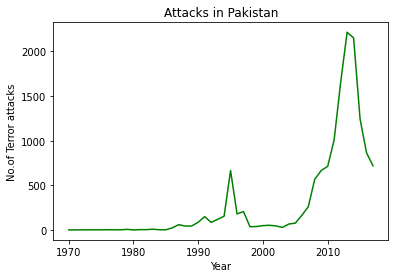

In [59]:
df[df.country_txt=='Pakistan'].iyear.value_counts().sort_index().plot.line(color='green')
plt.title('Attacks in Pakistan')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [60]:
df[df.country_txt=='Afghanistan'].iyear.value_counts().sort_index()

1973       1
1979       3
1987       1
1988      11
1989      10
1990       2
1991      30
1992      36
1994       9
1995       6
1996       4
1997       1
1998       1
1999       9
2000      14
2001      14
2002      38
2003     100
2004      88
2005     155
2006     282
2007     341
2008     414
2009     503
2010     542
2011     421
2012    1469
2013    1443
2014    1824
2015    1928
2016    1617
2017    1414
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

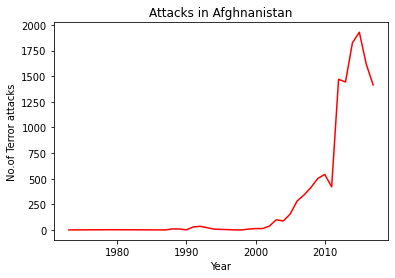

In [61]:
df[df.country_txt=='Afghanistan'].iyear.value_counts().sort_index().plot.line(color='red')
plt.title('Attacks in Afghnanistan')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [62]:
df[df.country_txt=='India'].iyear.value_counts().sort_index()

1972       1
1975       1
1976       1
1977       1
1979      20
1980      10
1981      16
1982      13
1983      47
1984     159
1985      39
1986      96
1987     166
1988     358
1989     324
1990     349
1991     339
1992     237
1994     107
1995     179
1996     213
1997     193
1998      61
1999     112
2000     180
2001     234
2002     184
2003     196
2004     108
2005     146
2006     167
2007     149
2008     534
2009     672
2010     663
2011     645
2012     611
2013     694
2014     860
2015     884
2016    1025
2017     966
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

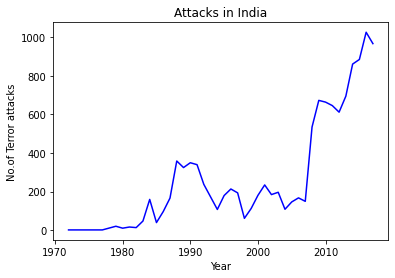

In [63]:
df[df.country_txt=='India'].iyear.value_counts().sort_index().plot.line(color='blue')
plt.title('Attacks in India')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [64]:
df[df.country_txt=='Colombia'].iyear.value_counts().sort_index()

1970      1
1972      2
1973      6
1975     10
1976     22
1977     80
1978    158
1979    140
1980    141
1981    172
1982    222
1983    234
1984    237
1985    382
1986    307
1987    337
1988    427
1989    492
1990    349
1991    420
1992    523
1994    201
1995    123
1996    409
1997    598
1998     94
1999    116
2000    137
2001    207
2002    150
2003     98
2004     37
2005     42
2006     43
2007     30
2008    133
2009    139
2010    136
2011     94
2012    115
2013    149
2014    231
2015    136
2016    109
2017    117
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

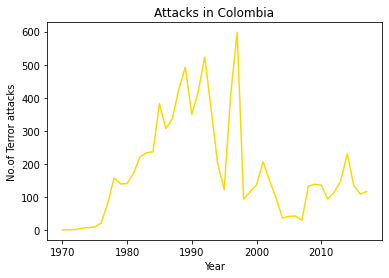

In [65]:
df[df.country_txt=='Colombia'].iyear.value_counts().sort_index().plot.line(color='gold')
plt.title('Attacks in Colombia')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [66]:
df[df.country_txt=='Philippines'].iyear.value_counts().sort_index()

1970     10
1971      4
1972      7
1974      1
1975      4
1976     10
1977      2
1978     36
1979     50
1980     60
1981     31
1982     38
1983     16
1984     43
1985    124
1986     80
1987    160
1988    210
1989    156
1990    320
1991    162
1992    162
1994     72
1995     63
1996     61
1997     57
1998     18
1999     31
2000    132
2001     50
2002     48
2003    107
2004     32
2005     25
2006     58
2007     65
2008    276
2009    229
2010    205
2011    151
2012    249
2013    651
2014    597
2015    721
2016    632
2017    692
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

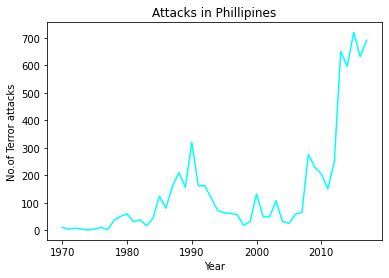

In [67]:
df[df.country_txt=='Philippines'].iyear.value_counts().sort_index().plot.line(color='aqua')
plt.title('Attacks in Phillipines')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [68]:
df[df.country_txt=='Peru'].iyear.value_counts().sort_index()

1973      3
1974      3
1975      2
1977      4
1978      4
1979      3
1980     64
1981    149
1982    350
1983    536
1984    592
1985    352
1986    568
1987    627
1988    355
1989    630
1990    495
1991    658
1992    383
1994     91
1995     44
1996     42
1997     58
1998      5
1999      5
2000      3
2001      3
2002      2
2003      1
2004      3
2005      2
2006      1
2007      4
2008      1
2009      4
2012      6
2013     10
2014     12
2015     10
2016      3
2017      8
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

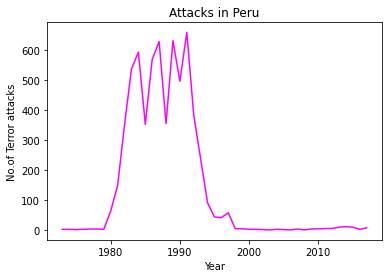

In [69]:
df[df.country_txt=='Peru'].iyear.value_counts().sort_index().plot.line(color='magenta')
plt.title('Attacks in Peru')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [70]:
df[df.country_txt=='El Salvador'].iyear.value_counts().sort_index()

1972      2
1973      1
1974      3
1975      3
1976     13
1977      6
1978     91
1979    326
1980    710
1981    664
1982    537
1983    371
1984    273
1985    436
1986    175
1987    234
1988    367
1989    356
1990    184
1991    500
1992     29
1994     21
1995      9
1996      7
1997      2
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

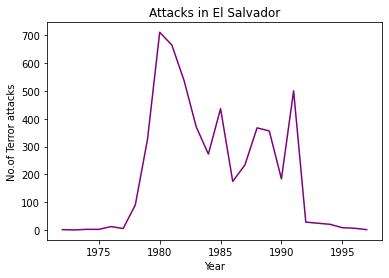

In [71]:
df[df.country_txt=='El Salvador'].iyear.value_counts().sort_index().plot.line(color='purple')
plt.title('Attacks in El Salvador')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [72]:
df[df.country_txt=='United Kingdom'].iyear.value_counts().sort_index()

1970     12
1971     81
1972    292
1973    189
1974    203
1975    194
1976    194
1977    140
1978    100
1979    239
1980    134
1981    142
1982     95
1983    177
1984    145
1985     67
1986     95
1987    117
1988    181
1989    163
1990    147
1991    262
1992    274
1994    256
1995     22
1996     36
1997     78
1998     63
1999     76
2000     61
2001     94
2002     21
2003     23
2004      5
2005     29
2006      6
2007     20
2008     39
2009     23
2010     57
2011     47
2012     55
2013    137
2014    103
2015    114
2016    105
2017    122
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

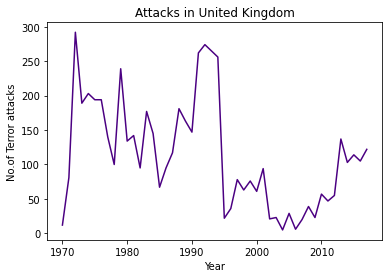

In [73]:
df[df.country_txt=='United Kingdom'].iyear.value_counts().sort_index().plot.line(color='indigo')
plt.title('Attacks in United Kingdom')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [74]:
df[df.country_txt=='Turkey'].iyear.value_counts().sort_index()

1970     12
1971     35
1972      9
1974      1
1975     10
1976     35
1977    189
1978     52
1979    141
1980     95
1981      8
1982      5
1983      5
1984     19
1985      2
1986      7
1987     43
1988     42
1989    114
1990    195
1991    293
1992    514
1994    300
1995    133
1996     54
1997     44
1998     23
1999    109
2000     35
2001     19
2002      5
2003     19
2004     27
2005     41
2006     43
2007     29
2008     32
2009     13
2010     20
2011     51
2012    188
2013     42
2014     94
2015    422
2016    542
2017    181
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

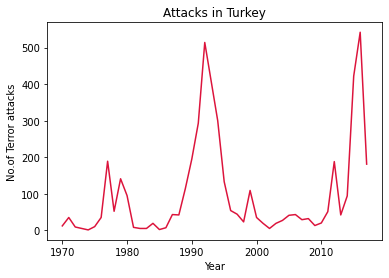

In [75]:
df[df.country_txt=='Turkey'].iyear.value_counts().sort_index().plot.line(color='crimson')
plt.title('Attacks in Turkey')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

**Most Notorious Terrorist Organisations**

In [76]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [77]:
df.gname.value_counts().head(30)


Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

Text(0, 0.5, 'No.of Terror attacks')

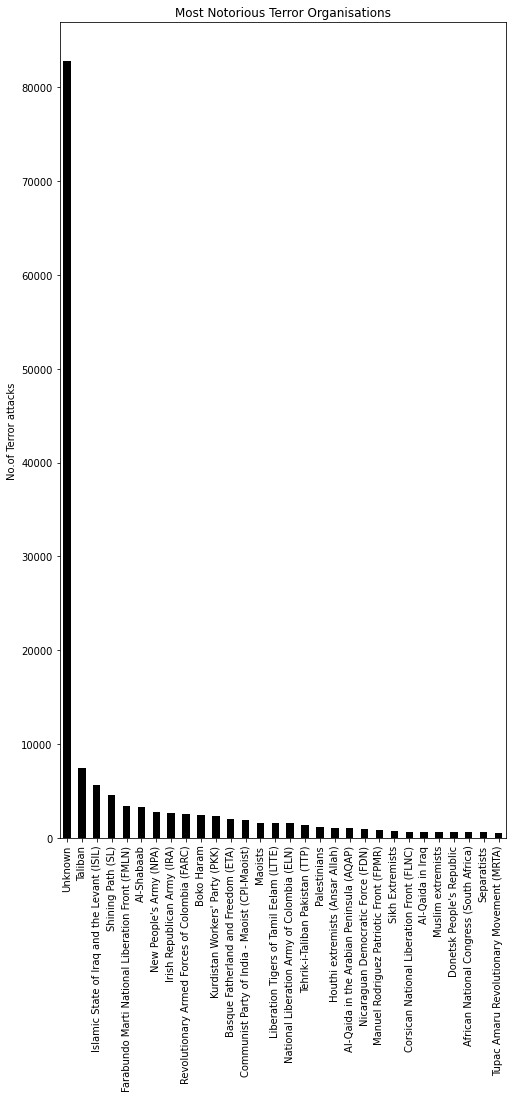

In [78]:
df.gname.value_counts().head(30).plot.bar(color='black',figsize=(8,15))
plt.title('Most Notorious Terror Organisations')
plt.ylabel('No.of Terror attacks')

In [79]:
df.groupby('gname')['iyear'].value_counts()

gname                                  iyear
1 May                                  1989     4
                                       1991     3
                                       1992     3
14 K Triad                             1998     4
14 March Coalition                     2008     1
                                               ..
Zulu Miners                            1994     1
Zuwar al-Imam Rida                     2013     1
Zviadists                              1998     1
Zwai Tribe                             2013     1
leftist guerrillas-Bolivarian militia  1995     1
Name: iyear, Length: 9038, dtype: int64

In [80]:
df[df.gname=='Taliban'].iyear.value_counts().head(30).sort_index()

1995       4
2001       4
2002       7
2003      50
2004      55
2005     120
2006     164
2007     208
2008     258
2009     268
2010     308
2011     214
2012     800
2013     775
2014    1035
2015    1249
2016    1065
2017     894
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

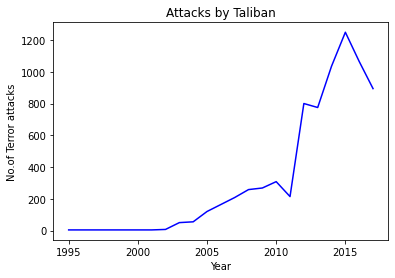

In [81]:
df[df.gname=='Taliban'].iyear.value_counts().head(30).sort_index().plot.line(color='blue')
plt.title('Attacks by Taliban')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [82]:
df[df.gname=='Islamic State of Iraq and the Levant (ISIL)'].iyear.value_counts().sort_index()

2013     374
2014    1249
2015    1221
2016    1454
2017    1315
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

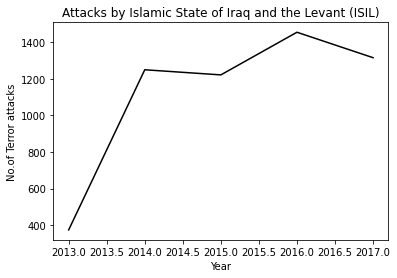

In [83]:
df[df.gname=='Islamic State of Iraq and the Levant (ISIL)'].iyear.value_counts().head(30).sort_index().plot.line(color='black')
plt.title('Attacks by Islamic State of Iraq and the Levant (ISIL)')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [84]:
df[df.gname=='Shining Path (SL)'].iyear.value_counts().sort_index()

1978      1
1979      1
1980     25
1981     87
1982    249
1983    493
1984    502
1985    249
1986    391
1987    464
1988    277
1989    509
1990    371
1991    426
1992    286
1994     74
1995     34
1996     23
1997     31
1998      3
1999      5
2000      2
2001      3
2002      1
2003      1
2004      2
2005      1
2006      1
2007      3
2009      4
2012      5
2013     10
2014      9
2015      6
2016      2
2017      4
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

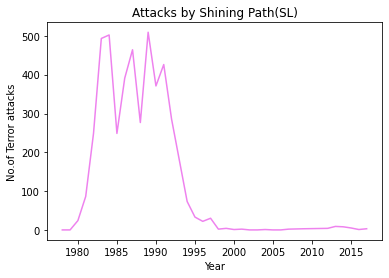

In [112]:
df[df.gname=='Shining Path (SL)'].iyear.value_counts().sort_index().plot.line(color='violet')
plt.title('Attacks by Shining Path(SL)')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [86]:
df[df.gname=='Farabundo Marti National Liberation Front (FMLN)'].iyear.value_counts().sort_index().head(30)

1978      1
1980    159
1981    160
1982    284
1983    320
1984    254
1985    422
1986    174
1987    209
1988    351
1989    335
1990    181
1991    492
1992      8
1994      1
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

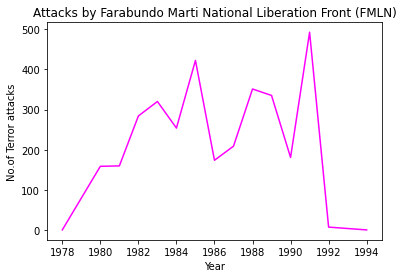

In [87]:
df[df.gname=='Farabundo Marti National Liberation Front (FMLN)'].iyear.value_counts().sort_index().head(30).plot.line(color='magenta')
plt.title('Attacks by Farabundo Marti National Liberation Front (FMLN)')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [88]:
df[df.gname=='Al-Shabaab'].iyear.value_counts().sort_index()

2007      6
2008     26
2009     57
2010     72
2011    164
2012    236
2013    325
2014    871
2015    397
2016    564
2017    570
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

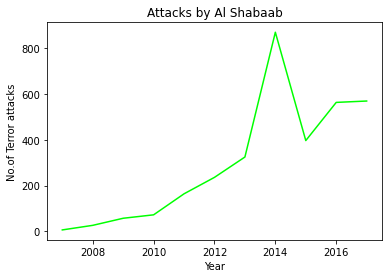

In [89]:
df[df.gname=="Al-Shabaab"].iyear.value_counts().sort_index().head(30).plot.line(color='lime')
plt.title('Attacks by Al Shabaab')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [90]:
df[df.gname=="New People's Army (NPA)"].iyear.value_counts().sort_index()

1970      2
1971      1
1976      3
1977      2
1978      5
1979     13
1980      3
1981     12
1982     13
1983      7
1984     18
1985     84
1986     46
1987    118
1988    178
1989    106
1990    183
1991     96
1992     64
1994     10
1995      2
1996      2
1997      4
1999      6
2000     16
2001      9
2002     14
2003     19
2004     13
2005      9
2006     18
2007     12
2008     86
2009     58
2010     55
2011     48
2012     86
2013    210
2014    289
2015    322
2016    172
2017    358
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

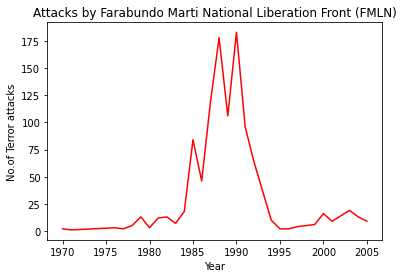

In [91]:
df[df.gname=="New People's Army (NPA)"].iyear.value_counts().sort_index().head(30).plot.line(color='red')
plt.title('Attacks by Farabundo Marti National Liberation Front (FMLN)')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [92]:
df[df.gname=="Irish Republican Army (IRA)"].iyear.value_counts().sort_index()

1970      7
1971     60
1972    162
1973    111
1974    113
1975     75
1976     93
1977    109
1978     88
1979    207
1980     94
1981    103
1982     56
1983    134
1984    118
1985     53
1986     45
1987     79
1988    133
1989    124
1990    107
1991    202
1992    184
1994    147
1995      4
1996     12
1997     14
1998     12
1999     10
2000      6
2002      2
2003      2
2005      1
2006      2
2008      1
2011      1
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

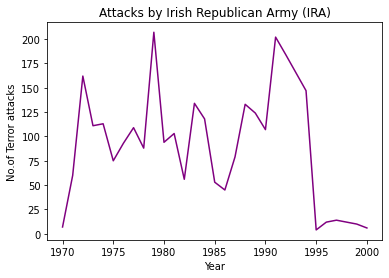

In [93]:
df[df.gname=="Irish Republican Army (IRA)"].iyear.value_counts().sort_index().head(30).plot.line(color='purple')
plt.title('Attacks by Irish Republican Army (IRA)')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [94]:
df[df.gname=="Revolutionary Armed Forces of Colombia (FARC)"].iyear.value_counts().sort_index()

1975      2
1976      3
1977     28
1978     27
1979     46
1980     38
1981     53
1982     64
1983     89
1984     54
1985     36
1986     32
1987     64
1988     58
1989     25
1990     30
1991    145
1992     54
1994     39
1995     47
1996     70
1997    152
1998     43
1999     50
2000     67
2001     48
2002    111
2003     61
2004     26
2005     30
2006     33
2007     23
2008     89
2009    105
2010    120
2011     83
2012     85
2013    105
2014    163
2015     78
2016     11
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

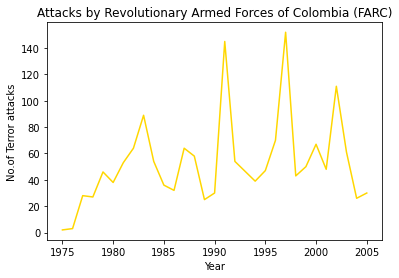

In [95]:
df[df.gname=="Revolutionary Armed Forces of Colombia (FARC)"].iyear.value_counts().sort_index().head(30).plot.line(color='gold')
plt.title('Attacks by Revolutionary Armed Forces of Colombia (FARC)')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

In [96]:
df[df.gname=="Boko Haram"].iyear.value_counts().sort_index()

2009     10
2010     17
2011    125
2012    424
2013    234
2014    495
2015    540
2016    240
2017    333
Name: iyear, dtype: int64

Text(0, 0.5, 'No.of Terror attacks')

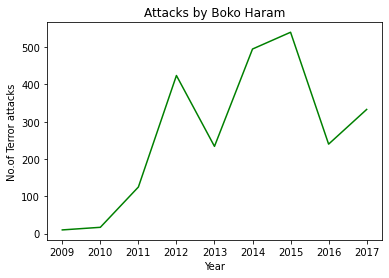

In [97]:
df[df.gname=="Boko Haram"].iyear.value_counts().sort_index().head(30).plot.line(color='green')
plt.title('Attacks by Boko Haram')
plt.xlabel('Year')
plt.ylabel('No.of Terror attacks')

**Country wise Analysis of Terrorist Organisation**

In [98]:
df.groupby('gname')['country_txt'].value_counts()

gname                                  country_txt 
1 May                                  Greece          10
14 K Triad                             Macau            4
14 March Coalition                     Lebanon          1
14th of December Command               Chile            3
15th of September Liberation Legion    Costa Rica       1
                                                       ..
Zulu Miners                            South Africa     1
Zuwar al-Imam Rida                     Lebanon          1
Zviadists                              Georgia          1
Zwai Tribe                             Libya            1
leftist guerrillas-Bolivarian militia  Colombia         1
Name: country_txt, Length: 5363, dtype: int64

In [99]:
df[df.gname=="Taliban"].country_txt.value_counts()

Afghanistan     7423
Pakistan          54
Turkmenistan       1
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

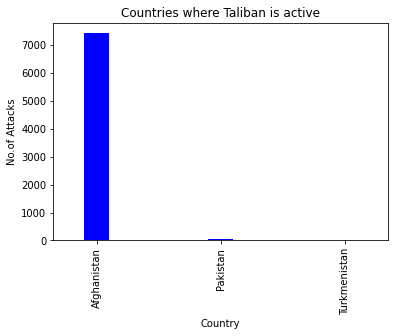

In [101]:
df[df.gname=="Taliban"].country_txt.value_counts().plot.bar(width=0.2,color ='blue')
plt.title('Countries where Taliban is active')
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

In [102]:
df[df.gname=="Islamic State of Iraq and the Levant (ISIL)"].country_txt.value_counts()

Iraq                        4797
Syria                        594
Turkey                        82
Lebanon                       50
Philippines                   26
Saudi Arabia                  15
France                         9
Jordan                         6
Tunisia                        5
Russia                         4
Belgium                        3
Egypt                          3
West Bank and Gaza Strip       3
Iran                           2
United Kingdom                 2
Bahrain                        2
Libya                          2
Yemen                          1
Germany                        1
Malaysia                       1
Indonesia                      1
Somalia                        1
Georgia                        1
Israel                         1
Australia                      1
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

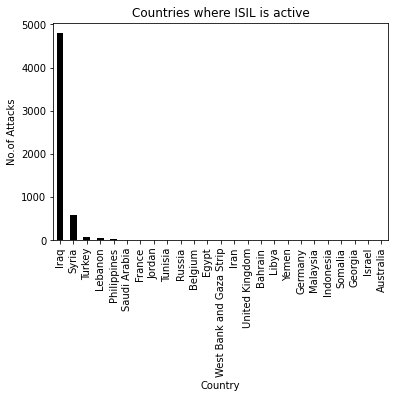

In [107]:
df[df.gname=="Islamic State of Iraq and the Levant (ISIL)"].country_txt.value_counts().plot.bar(width=0.5,color ='black')
plt.title('Countries where ISIL is active')
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

In [108]:
df[df.gname=="Shining Path (SL)"].country_txt.value_counts()

Peru         4541
Bolivia         6
Colombia        4
Brazil          2
Argentina       1
Mexico          1
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

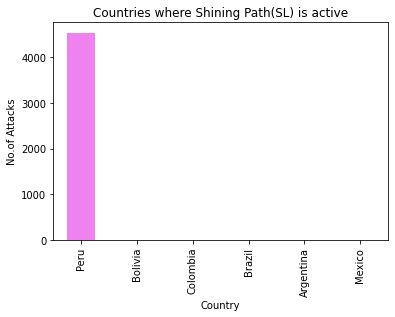

In [109]:
df[df.gname=="Shining Path (SL)"].country_txt.value_counts().plot.bar(width=0.5,color ='violet')
plt.title('Countries where Shining Path(SL) is active')
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

In [110]:
df[df.gname=="Farabundo Marti National Liberation Front (FMLN)"].country_txt.value_counts()

El Salvador    3330
Honduras         12
Guatemala         5
Costa Rica        2
Nicaragua         2
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

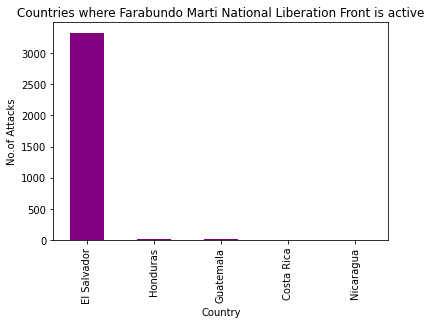

In [111]:
df[df.gname=="Farabundo Marti National Liberation Front (FMLN)"].country_txt.value_counts().plot.bar(width=0.5,color ='purple')
plt.title('Countries where Farabundo Marti National Liberation Front is active')
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

In [ ]:
df[df.gname=="Al-Shabaab"].country_txt.value_counts()

Somalia     2867
Kenya        408
Ethiopia       6
Uganda         5
Djibouti       1
Tanzania       1
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

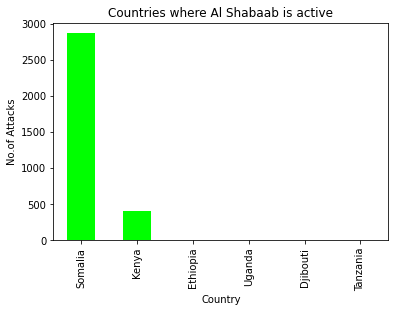

In [113]:
df[df.gname=="Al-Shabaab"].country_txt.value_counts().plot.bar(width=0.5,color ='lime')
plt.title('Countries where Al Shabaab is active')
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

In [117]:
df[df.gname=="New People's Army (NPA)"].country_txt.value_counts()

Philippines    2770
Pakistan          1
India             1
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

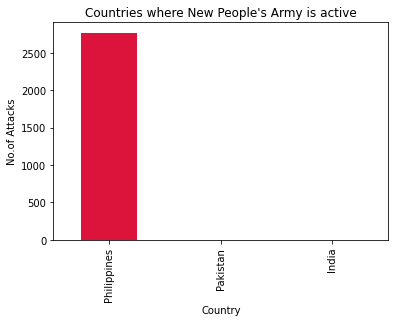

In [116]:
df[df.gname=="New People's Army (NPA)"].country_txt.value_counts().plot.bar(width=0.5,color ='crimson')
plt.title("Countries where New People's Army is active")
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

In [ ]:
df[df.gname=="Irish Republican Army (IRA)"].country_txt.value_counts()

United Kingdom        2575
Ireland                 52
West Germany (FRG)      27
Netherlands              4
Belgium                  3
United States            2
France                   2
Zaire                    1
Portugal                 1
Denmark                  1
Switzerland              1
Greece                   1
Germany                  1
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

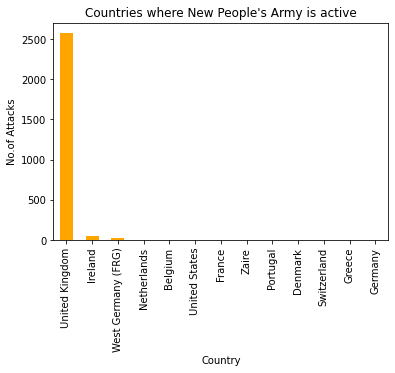

In [118]:
df[df.gname=="Irish Republican Army (IRA)"].country_txt.value_counts().plot.bar(width=0.5,color ='orange')
plt.title("Countries where New People's Army is active")
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

In [ ]:
df[df.gname=="Revolutionary Armed Forces of Colombia (FARC)"].country_txt.value_counts()

Colombia     2468
Venezuela       9
Peru            4
Panama          3
Ecuador         2
Brazil          1
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

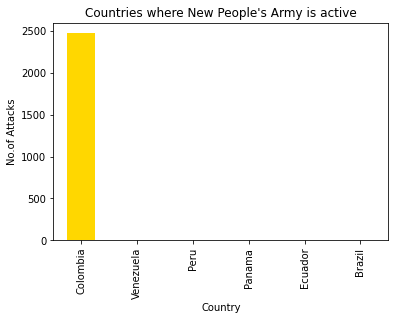

In [119]:
df[df.gname=="Revolutionary Armed Forces of Colombia (FARC)"].country_txt.value_counts().plot.bar(width=0.5,color ='gold')
plt.title("Countries where New People's Army is active")
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

In [ ]:
df[df.gname=="Boko Haram"].country_txt.value_counts()

Nigeria         2087
Cameroon         233
Niger             63
Chad              33
Burkina Faso       1
Mali               1
Name: country_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

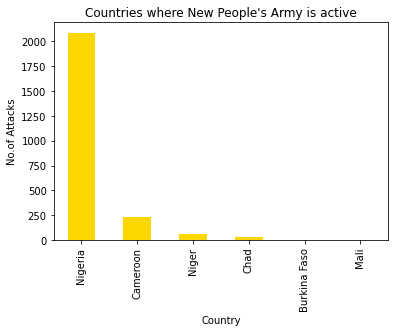

In [120]:
df[df.gname=="Boko Haram"].country_txt.value_counts().plot.bar(width=0.5,color ='gold')
plt.title("Countries where New People's Army is active")
plt.xlabel('Country')
plt.ylabel('No.of Attacks')

**What motivates Terror?**

In [ ]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.motive.value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                  14889
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                           14430
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                                        

**Most Vulnerable Terror Targets**

In [ ]:
df.targtype1_txt.value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

Text(0, 0.5, 'No.of Attacks')

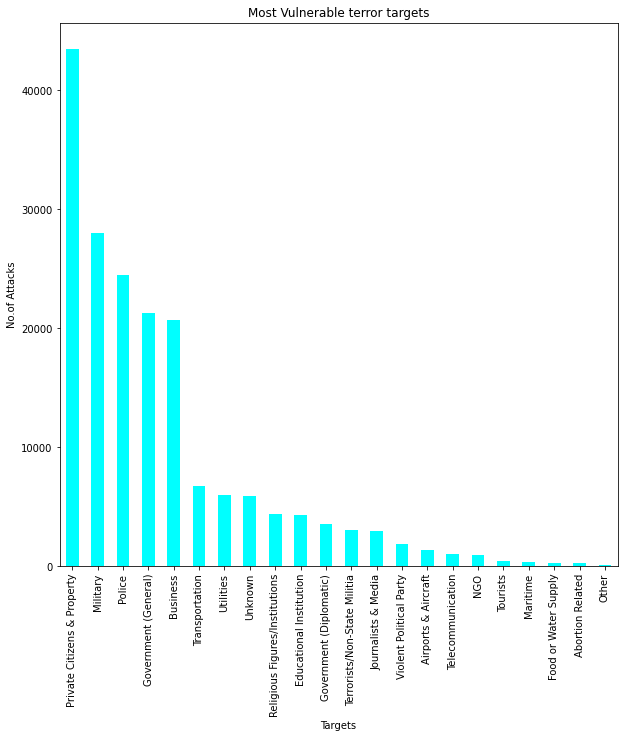

In [124]:
df.targtype1_txt.value_counts().plot.bar(width=0.5,color ='cyan', figsize=(10,10))
plt.title("Most Vulnerable terror targets")
plt.xlabel('Targets')
plt.ylabel('No.of Attacks')

**Most Targeted Groups**

In [125]:
df.targsubtype1_txt.value_counts().head(20)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Police Patrol (including vehicles and convoys)              5105
Government Building/Facility/Office                         4802
Retail/Grocery/Bakery                                       4274
Electricity                                                 4198
Bank/Commerce                                               3242
House/Apartment/Residence                                   3044
School/University/Educati

Text(0, 0.5, 'No.of Attacks')

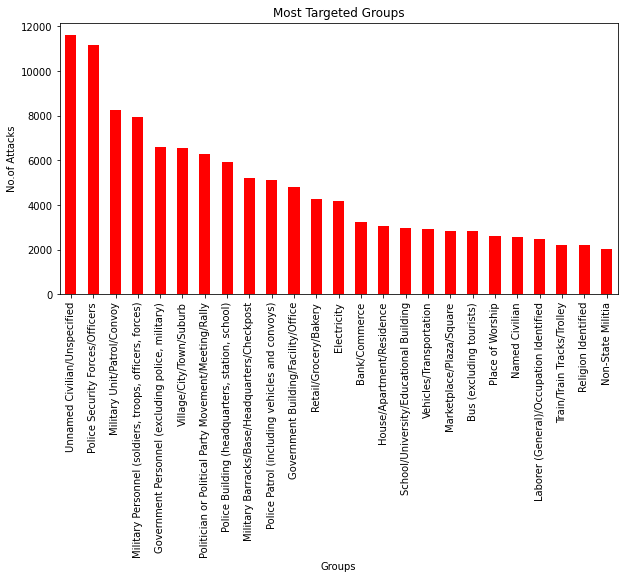

In [130]:
df.targsubtype1_txt.value_counts().head(25).plot.bar(width=0.5,color ='red', figsize=(10,5))
plt.title("Most Targeted Groups")
plt.xlabel('Groups')
plt.ylabel('No.of Attacks')

**Mode used Claim Responsibility of the Attack**

In [ ]:
df.claimmode_txt.value_counts().head(30)

Personal claim                   5207
Posted to website, blog, etc.    4506
Unknown                          3977
Call (post-incident)             1780
Note left at scene               1212
E-mail                           1076
Other                             459
Video                             354
Letter                            333
Call (pre-incident)               179
Name: claimmode_txt, dtype: int64

Text(0, 0.5, 'No.of incidents')

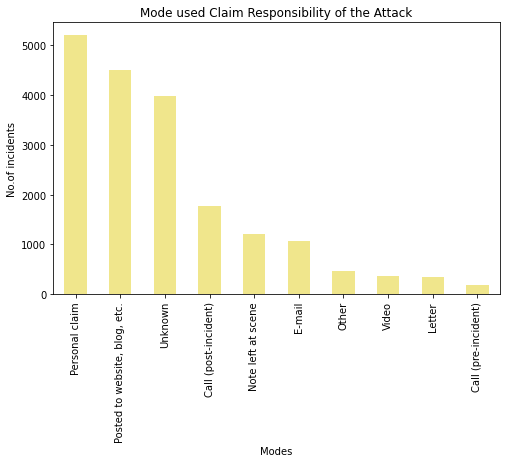

In [128]:
df.claimmode_txt.value_counts().head(30).plot.bar(width=0.5,color ='khaki', figsize=(8,5))
plt.title("Mode used Claim Responsibility of the Attack")
plt.xlabel('Modes')
plt.ylabel('No.of incidents')